In [4]:
#Import libraries 
import numpy as np 
import matplotlib as plt 
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split




In [63]:
#Import EMG Dataset
X = np.genfromtxt('training_matrix03.csv', delimiter=',', skip_header=2)
X1 = np.genfromtxt('test_matrix01.csv', delimiter=',', skip_header=2)

m,n = np.shape(X)

x_train = []
y_train = [] 
x_test = []
y_test = []


#Split data x_train, y_train
x_train = X[:,1:n-1]
y_train = X[:,64]


#Test data 
x_test = X1[:,1:n-1]
y_test = X1[:,64]



In [62]:
np.shape(x_test)

(240, 63)

In [105]:
distance 

#view distance matrix 
def distance_cost_grid(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();
    

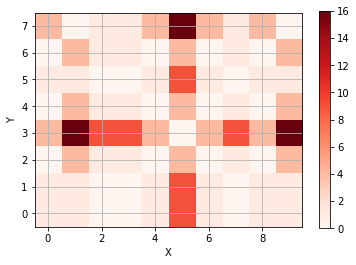

In [106]:
distance_cost_grid(distance)

In [52]:
np.array(x_train)

array([[2.14009950e-02, 5.98579000e-02, 6.96497590e-01, ...,
        6.24415967e+01, 7.27772442e-01, 7.27772442e-01],
       [1.57046055e-01, 4.67667184e-01, 9.84250144e-01, ...,
        4.57180088e+01, 7.29494383e-01, 7.29494383e-01],
       [1.71323955e-01, 1.67300549e-01, 1.40920440e+00, ...,
        4.44866291e+01, 5.98878356e-01, 5.98878356e-01],
       ...,
       [6.49464230e-02, 1.30836992e-01, 2.75236940e-01, ...,
        1.46716716e+01, 6.07373925e-01, 6.07373925e-01],
       [8.94457420e-02, 6.78925200e-02, 4.38907103e-01, ...,
        2.36233059e+01, 6.04955670e-01, 6.04955670e-01],
       [1.81017378e-01, 1.88122721e-01, 1.01189888e+00, ...,
        5.14200844e+01, 6.50080402e-01, 6.50080402e-01]])

In [9]:
#test with small data set 
X = np.random.random((100,10))
y = np.random.randint(0,2, (100))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Using Dynamic time warp as custom metric 
def DTW(x,y):   
    i = x.size
    j = y.size
    #compute distance matrix using library 
    distance_mat = distance.cdist(x.reshape(-1,1),y.reshape(-1,1))
    #initialize cumulative distance array with inf and start point (0,0)
    cumdist = np.matrix(np.ones((i+1,j+1)) * np.inf)
    cumdist[0,0] = 0 #start point 

    for i in range(i):
        for j in range(j):
            minimum_cost = np.min([cumdist[i, j+1],
                                   cumdist[i+1, j],
                                   cumdist[i, j]])
            cumdist[i+1, j+1] = distance_mat[i,j] + minimum_cost

    return cumdist[i, j]  

#Train using knn library 
parameters = {'n_neighbors':[2,4,8]} #using one 
clf = GridSearchCV(KNeighborsClassifier(metric=DTW), parameters, verbose=3)
clf.fit(x_train, y_train)


#evaluate
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_neighbors=2 ...................................................
[CV] .......... n_neighbors=2, score=0.6521739130434783, total=   2.4s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] .......... n_neighbors=2, score=0.6363636363636364, total=   1.1s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


[CV] .......... n_neighbors=2, score=0.6363636363636364, total=   2.2s
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.6521739130434783, total=   1.4s
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.6363636363636364, total=   1.8s
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=0.6363636363636364, total=   3.2s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=0.6521739130434783, total=   2.3s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=0.6363636363636364, total=   2.6s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=0.6363636363636364, total=   1.3s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   56.7s finished


             precision    recall  f1-score   support

          0       0.45      1.00      0.62        15
          1       0.00      0.00      0.00        18

avg / total       0.21      0.45      0.28        33



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
""""#Use DTW with in-built knn from library 
#accumulated cost for taking all paths: we want to find the min path in the cost matrix 
#start from (0,0)
def Dynamic_time_warp(x):
#input is the two time series data => train and test 
#output is the minimum paths 

#compute the distance matrix using the euclidean distance between points 
    for i in range(len(x)):
        for j in range(len(x)):
            distance[i,j] =  (x[j] - x[i])**2
        
        
    cost_mat = np.zeros((len(x), len(x))) #initialize cost matrix 

    #Starting point 
    cost_mat[0,0] =  distance[0,0] 

    #moving along the first row form (0,0)
    for i in range(1, len(x)):
        cost_mat[0,i] =  distance[0,i] +cost_mat[0,i-1]

    #moving from (0,0) upwards 
    for i in range(1,len(x)):
        cost_mat[i,0] = distance[i,0] + cost_mat[i-1, 0]
    
    #compute minimum 
    for i in range(1,len(x)):
        for i in range(1,len(x)):
            cost_mat[i,j] = distance[i,j] + min(cost_mat[i-1, j-1], cost_mat[i-1, j], cost_mat[i, j-1])
        
    return cost_mat[i,j]"""
